# Stress Intensity factors

The Parker textbook gives a solution for computing the stress intensity factor for a pressurized mode 1 crack. Let's look at the solution...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
a = 1e5 # crack length m
x = np.arange(0.,a) # x coords to evaluate Pressure function and K
rho_l = 2900 # density of lithosphere
rho_w = 1035 # density of water
g = 9.8 #
H = 7e3 # plate thickness, m

Here's a very simple topography, just a linear decrease from a mid-segment high to a zero height crack tip. To evaluate the pressure, we use the simple force balance (see T&S)

In [28]:
delta = 500 - x*(0.005)
p_x = (rho_l - rho_w)*g*delta*H/2

Text(0, 0.5, 'Pressure (MPa)')

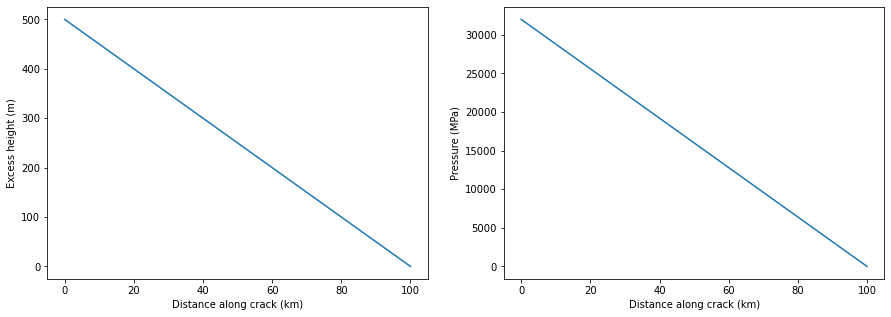

In [29]:
[fig, ax] = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x/1e3,delta)
ax[0].set_xlabel('Distance along crack (km)')
ax[0].set_ylabel('Excess height (m)')

ax[1].plot(x/1e3,p_x/1e6)
ax[1].set_xlabel('Distance along crack (km)')
ax[1].set_ylabel('Pressure (MPa)')

In [30]:
K_a = (2/H)*math.sqrt(a/math.pi)
K_b = np.trapz(p_x/(np.sqrt(a**2 - x**2)),x=x)
K = K_a*K_b
print(f"Stress intensity factor is {K:e}")

Stress intensity factor is 9.306388e+08


Let's make delta a slightly more interesting function...

In [74]:
delta = 200*np.sin(2*math.pi*x/1.5e5 - 5000*math.pi/1.5e5)
p_x = (rho_l - rho_w)*g*delta*H/2

Text(0, 0.5, 'Pressure (MPa)')

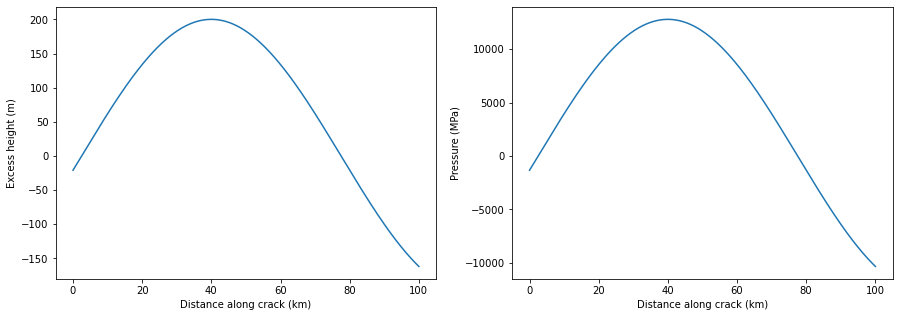

In [75]:
[fig, ax] = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x/1e3,delta)
ax[0].set_xlabel('Distance along crack (km)')
ax[0].set_ylabel('Excess height (m)')

ax[1].plot(x/1e3,p_x/1e6)
ax[1].set_xlabel('Distance along crack (km)')
ax[1].set_ylabel('Pressure (MPa)')

In [76]:
K_a = (2/H)*math.sqrt(a/math.pi)
K_b = np.trapz(p_x/(np.sqrt(a**2 - x**2)),x=x)
K = K_a*K_b
print(f"Stress intensity factor is {K:e}")

Stress intensity factor is 9.982448e+07


So, nothing particularly interesting going on, but it appears the calculation is on the right order of magnitude.